6. Visuals & Dashboards

6.1 Importing The File

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the final processed dataset from Notebook_05
df_final = pd.read_csv("IPO_Meta/df_final_for_viz.csv")

# Convert date columns - use flexible parsing
df_final['listing_date'] = pd.to_datetime(df_final['listing_date'], format='mixed', errors='coerce')

# Also convert other date columns if they exist
if 'issue_open' in df_final.columns:
    df_final['issue_open'] = pd.to_datetime(df_final['issue_open'], format='mixed', errors='coerce')
if 'issue_close' in df_final.columns:
    df_final['issue_close'] = pd.to_datetime(df_final['issue_close'], format='mixed', errors='coerce')

 
print("DATA LOADED FOR VISUALIZATIONS")
print(f"✓ Total IPOs: {len(df_final)}")
print(f"✓ Columns: {len(df_final.columns)}")
print(f"✓ Date range: {df_final['listing_date'].min()} to {df_final['listing_date'].max()}")
print("="*80)

DATA LOADED FOR VISUALIZATIONS
✓ Total IPOs: 40
✓ Columns: 23
✓ Date range: 2019-07-04 00:00:00 to 2024-12-31 00:00:00


PROFESSIONAL IPO VISUALIZATIONS - NOTEBOOK_06


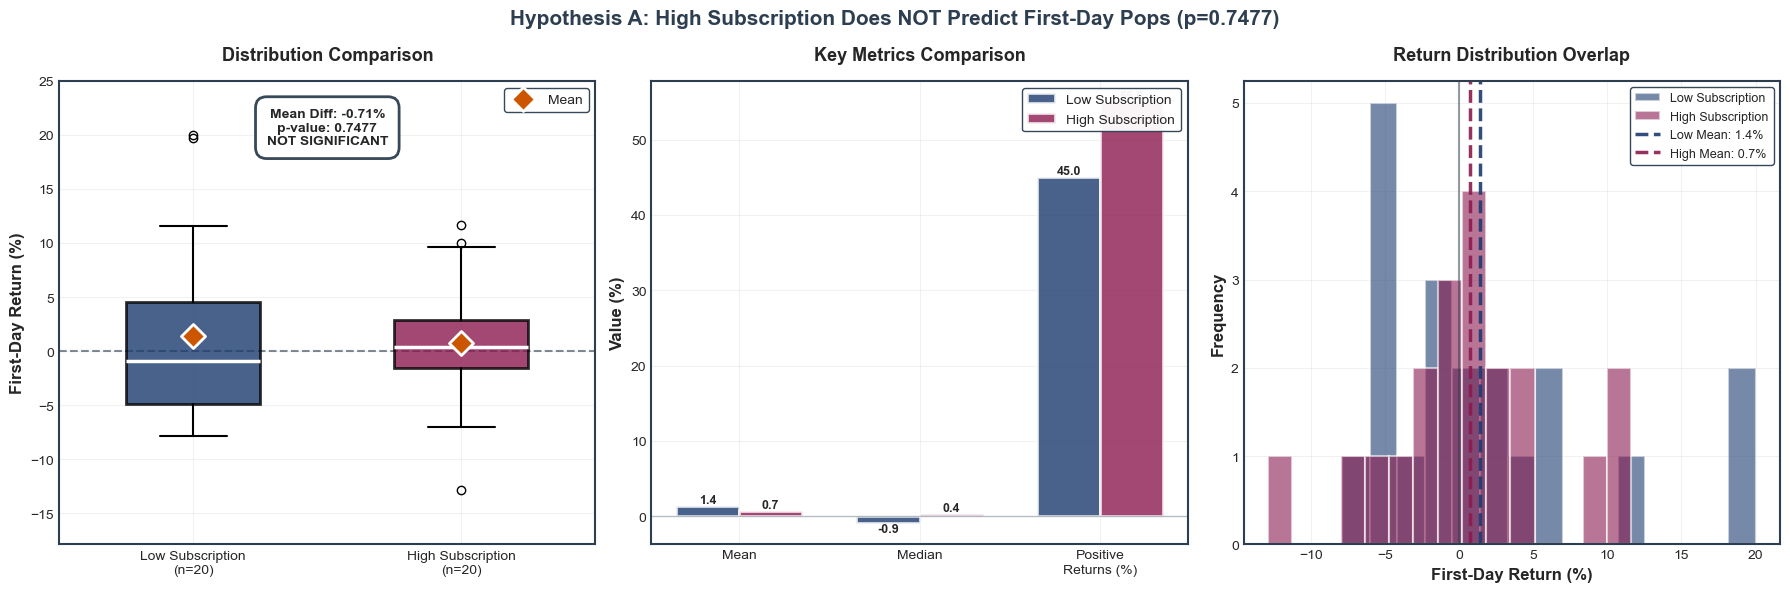


✓ Figure 1 Complete: Hypothesis A


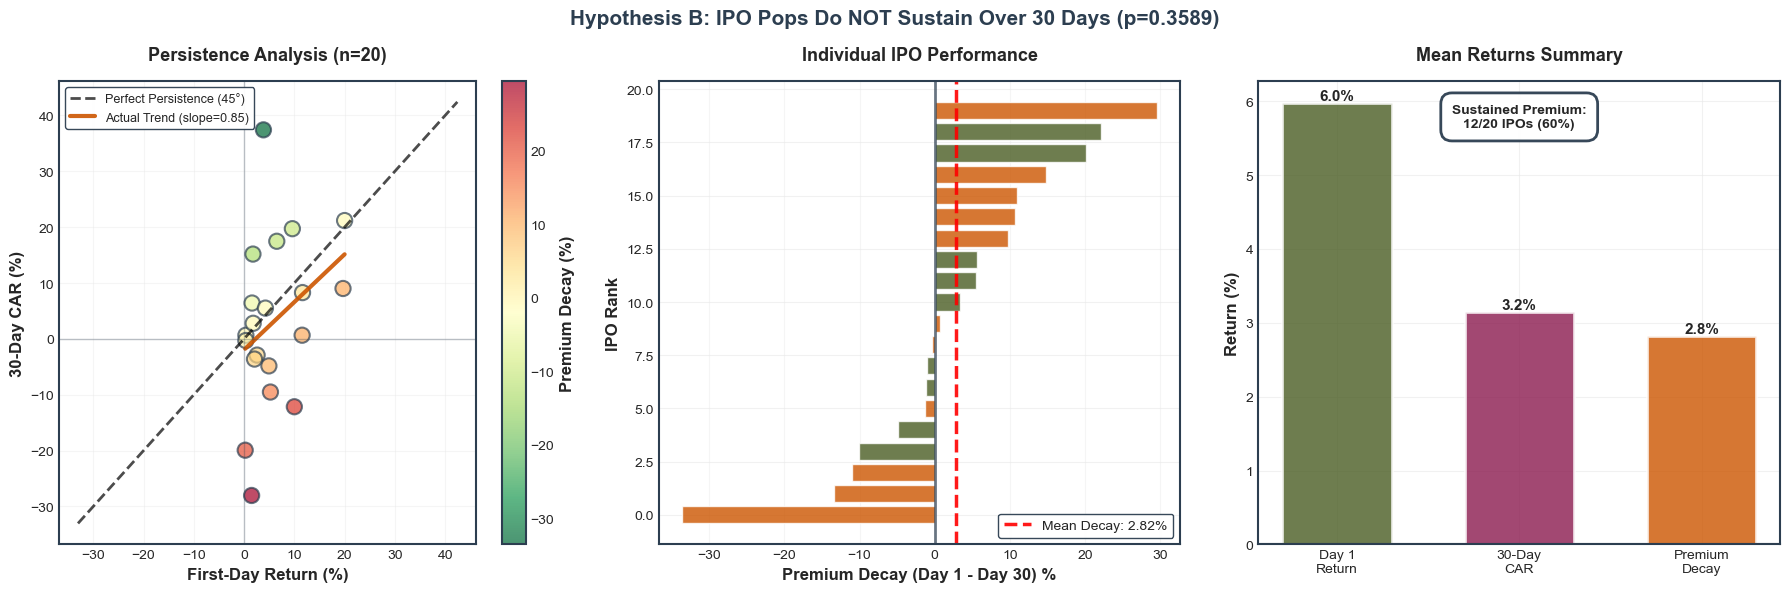

✓ Figure 2 Complete: Hypothesis B


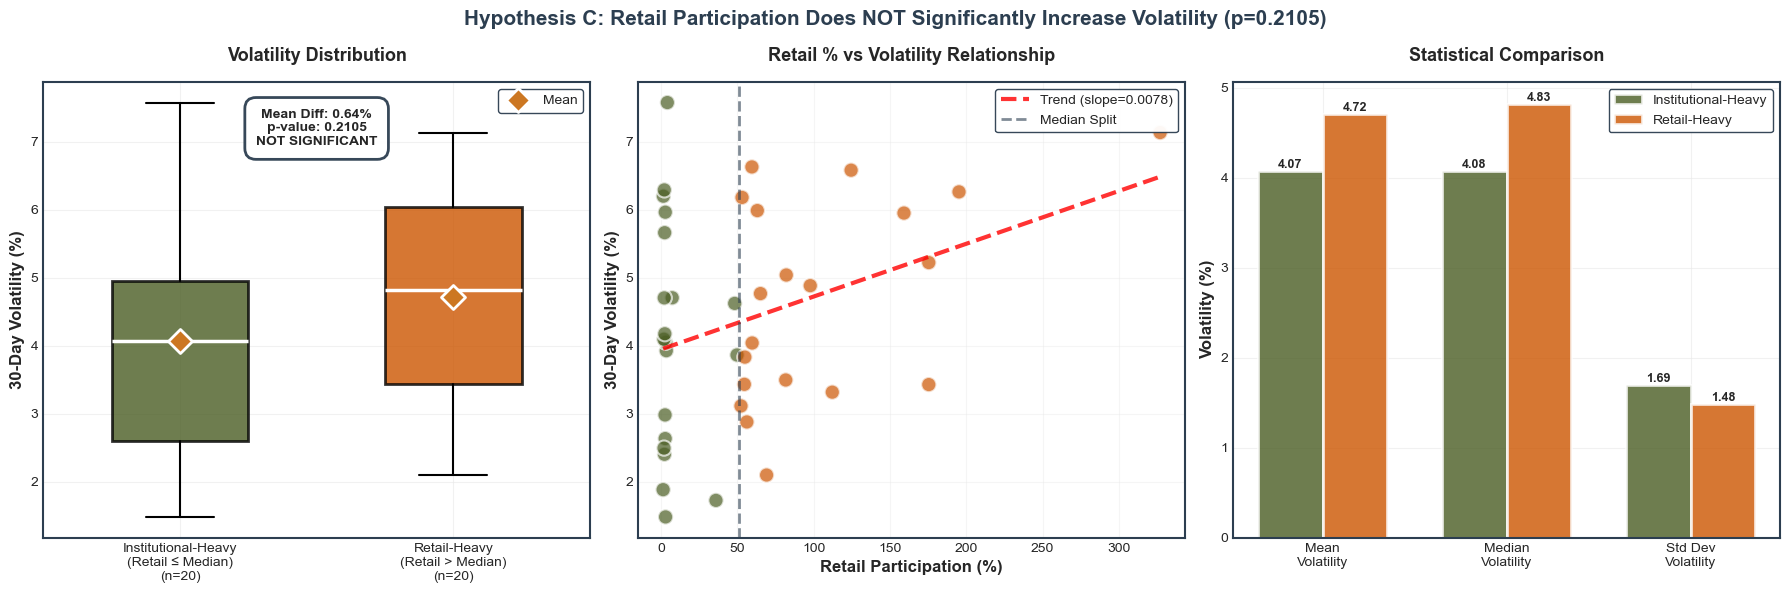

✓ Figure 3 Complete: Hypothesis C

EXECUTIVE SUMMARY - HYPOTHESIS TESTING RESULTS
                           Hypothesis  Sample Mean Difference p-value   Result                                    Interpretation
A: High-Subscription → First-Day Pops 40 IPOs          -0.71%  0.7477 REJECTED  No evidence that high subscription predicts pops
  B: Listing Premium Sustains 30 Days 20 IPOs     2.82% decay  0.3589 REJECTED     IPO premiums decay significantly over 30 days
  C: Retail-Heavy → Higher Volatility 40 IPOs           0.64%  0.2105 REJECTED Retail participation does not increase volatility


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Dark professional color palette
COLORS = {
    'navy': '#1B3B6F',           # Navy Blue
    'olive': '#4A5D23',          # Dark Olive Green
    'ochre': '#CC7722',          # Dark Ochre Yellow
    'magenta': '#8B1A4F',        # Dark Magenta
    'burnt_orange': '#CC5500',   # Dark Burnt Orange
    'neutral_dark': '#2C3E50',   # Dark Gray
    'neutral_light': '#95A5A6',  # Light Gray
    'background': '#FFFFFF',     # White background
    'grid': '#E8E8E8'           # Light grid
}

# Set professional matplotlib style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette([COLORS['navy'], COLORS['magenta'], COLORS['olive'], 
                 COLORS['ochre'], COLORS['burnt_orange']])

# Global plot parameters
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': COLORS['neutral_dark'],
    'axes.linewidth': 1.5,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'legend.frameon': True,
    'legend.framealpha': 0.95,
    'legend.edgecolor': COLORS['neutral_dark'],
    'grid.color': COLORS['grid'],
    'grid.linewidth': 0.8,
    'grid.alpha': 0.6,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans']
})

print("="*80)
print("PROFESSIONAL IPO VISUALIZATIONS - NOTEBOOK_06")
print("="*80)

 
# FIGURE 1: HYPOTHESIS A - SUBSCRIPTION vs FIRST-DAY RETURNS
 

fig1 = plt.figure(figsize=(18, 6))
fig1.suptitle('Hypothesis A: High Subscription Does NOT Predict First-Day Pops (p=0.7477)', 
              fontsize=15, fontweight='bold', color=COLORS['neutral_dark'], y=0.98)

# Prepare data
df_h1 = df_final[df_final['day1_return'].notna()].copy()
df_h1['day1_return_pct'] = df_h1['day1_return'] * 100

high_sub = df_h1[df_h1['high_sub_dummy'] == 1]['day1_return_pct']
low_sub = df_h1[df_h1['high_sub_dummy'] == 0]['day1_return_pct']

# Panel 1: Clean Box Plot with Statistical Annotations
ax1 = plt.subplot(1, 3, 1)
positions = [1, 2]
bp = ax1.boxplot([low_sub, high_sub], 
                  positions=positions,
                  tick_labels=['Low Subscription\n(n=20)', 'High Subscription\n(n=20)'],
                  patch_artist=True,
                  widths=0.5,
                  boxprops=dict(linewidth=2),
                  whiskerprops=dict(linewidth=1.5),
                  capprops=dict(linewidth=1.5),
                  medianprops=dict(linewidth=2.5, color='white'))

bp['boxes'][0].set_facecolor(COLORS['navy'])
bp['boxes'][0].set_alpha(0.8)
bp['boxes'][1].set_facecolor(COLORS['magenta'])
bp['boxes'][1].set_alpha(0.8)

ax1.axhline(0, color=COLORS['neutral_dark'], linestyle='--', linewidth=1.5, alpha=0.6, zorder=1)
ax1.scatter(positions, [low_sub.mean(), high_sub.mean()], 
           color=COLORS['burnt_orange'], marker='D', s=150, zorder=5,
           edgecolors='white', linewidths=2, label='Mean')

ax1.set_ylabel('First-Day Return (%)', fontweight='bold')
ax1.set_title('Distribution Comparison', fontweight='bold', pad=15)
ax1.legend(loc='upper right')
ax1.set_ylim(df_h1['day1_return_pct'].min() - 5, df_h1['day1_return_pct'].max() + 5)

# Add statistical annotation
ax1.text(1.5, ax1.get_ylim()[1] * 0.9, 
        f'Mean Diff: {high_sub.mean() - low_sub.mean():.2f}%\np-value: 0.7477\nNOT SIGNIFICANT',
        ha='center', va='top', fontsize=10, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='white', 
                 edgecolor=COLORS['neutral_dark'], linewidth=2, alpha=0.95))

# Panel 2: Side-by-Side Comparison Bars
ax2 = plt.subplot(1, 3, 2)
metrics = ['Mean', 'Median', 'Positive\nReturns (%)']
low_vals = [low_sub.mean(), low_sub.median(), (low_sub > 0).mean()*100]
high_vals = [high_sub.mean(), high_sub.median(), (high_sub > 0).mean()*100]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax2.bar(x - width/2, low_vals, width, label='Low Subscription',
               color=COLORS['navy'], alpha=0.8, edgecolor='white', linewidth=2)
bars2 = ax2.bar(x + width/2, high_vals, width, label='High Subscription',
               color=COLORS['magenta'], alpha=0.8, edgecolor='white', linewidth=2)

ax2.set_ylabel('Value (%)', fontweight='bold')
ax2.set_title('Key Metrics Comparison', fontweight='bold', pad=15)
ax2.set_xticks(x)
ax2.set_xticklabels(metrics)
ax2.legend(loc='upper right')
ax2.axhline(0, color=COLORS['neutral_dark'], linestyle='-', linewidth=1, alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom' if height > 0 else 'top',
                fontsize=9, fontweight='bold')

# Panel 3: Distribution Density Plot
ax3 = plt.subplot(1, 3, 3)
ax3.hist(low_sub, bins=15, alpha=0.6, label='Low Subscription', 
        color=COLORS['navy'], edgecolor='white', linewidth=1.5)
ax3.hist(high_sub, bins=15, alpha=0.6, label='High Subscription',
        color=COLORS['magenta'], edgecolor='white', linewidth=1.5)

ax3.axvline(low_sub.mean(), color=COLORS['navy'], linestyle='--', linewidth=2.5,
           label=f'Low Mean: {low_sub.mean():.1f}%', alpha=0.9)
ax3.axvline(high_sub.mean(), color=COLORS['magenta'], linestyle='--', linewidth=2.5,
           label=f'High Mean: {high_sub.mean():.1f}%', alpha=0.9)
ax3.axvline(0, color=COLORS['neutral_dark'], linestyle='-', linewidth=1.5, alpha=0.5)

ax3.set_xlabel('First-Day Return (%)', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')
ax3.set_title('Return Distribution Overlap', fontweight='bold', pad=15)
ax3.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()

print("\n✓ Figure 1 Complete: Hypothesis A")

 
# FIGURE 2: HYPOTHESIS B - PREMIUM SUSTAINABILITY
 

fig2 = plt.figure(figsize=(18, 6))
fig2.suptitle('Hypothesis B: IPO Pops Do NOT Sustain Over 30 Days (p=0.3589)', 
              fontsize=15, fontweight='bold', color=COLORS['neutral_dark'], y=0.98)

# Prepare data
df_h2 = df_final[(df_final['day1_return'] > 0) & (df_final['car_30'].notna())].copy()
df_h2['day1_return_pct'] = df_h2['day1_return'] * 100
df_h2['car_30_pct'] = df_h2['car_30'] * 100
df_h2['decay'] = df_h2['day1_return_pct'] - df_h2['car_30_pct']

# Panel 1: Scatter Plot with Regression
ax1 = plt.subplot(1, 3, 1)
scatter = ax1.scatter(df_h2['day1_return_pct'], df_h2['car_30_pct'],
                     s=120, c=df_h2['decay'], cmap='RdYlGn_r',
                     alpha=0.7, edgecolors=COLORS['neutral_dark'], linewidth=1.5)

# 45-degree line (perfect persistence)
lims = [min(df_h2['day1_return_pct'].min(), df_h2['car_30_pct'].min()) - 5,
        max(df_h2['day1_return_pct'].max(), df_h2['car_30_pct'].max()) + 5]
ax1.plot(lims, lims, 'k--', linewidth=2, label='Perfect Persistence (45°)', alpha=0.7)

# Regression line
z = np.polyfit(df_h2['day1_return_pct'], df_h2['car_30_pct'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_h2['day1_return_pct'].min(), df_h2['day1_return_pct'].max(), 100)
ax1.plot(x_line, p(x_line), color=COLORS['burnt_orange'], linewidth=3,
        label=f'Actual Trend (slope={z[0]:.2f})', alpha=0.9)

ax1.axhline(0, color=COLORS['neutral_dark'], linestyle='-', linewidth=1, alpha=0.3)
ax1.axvline(0, color=COLORS['neutral_dark'], linestyle='-', linewidth=1, alpha=0.3)

ax1.set_xlabel('First-Day Return (%)', fontweight='bold')
ax1.set_ylabel('30-Day CAR (%)', fontweight='bold')
ax1.set_title('Persistence Analysis (n=20)', fontweight='bold', pad=15)
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.4)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax1, label='Premium Decay (%)')
cbar.ax.yaxis.label.set_weight('bold')

# Panel 2: Decay Distribution
ax2 = plt.subplot(1, 3, 2)
colors_decay = [COLORS['olive'] if x < 0 else COLORS['burnt_orange'] for x in df_h2['decay']]
bars = ax2.barh(range(len(df_h2)), df_h2['decay'].sort_values(),
               color=colors_decay, alpha=0.8, edgecolor='white', linewidth=1)

ax2.axvline(0, color=COLORS['neutral_dark'], linestyle='-', linewidth=2, alpha=0.7)
ax2.axvline(df_h2['decay'].mean(), color='red', linestyle='--', linewidth=2.5,
           label=f'Mean Decay: {df_h2["decay"].mean():.2f}%', alpha=0.9)

ax2.set_xlabel('Premium Decay (Day 1 - Day 30) %', fontweight='bold')
ax2.set_ylabel('IPO Rank', fontweight='bold')
ax2.set_title('Individual IPO Performance', fontweight='bold', pad=15)
ax2.legend(loc='lower right')
ax2.grid(True, alpha=0.4, axis='x')

# Panel 3: Summary Statistics
ax3 = plt.subplot(1, 3, 3)
categories = ['Day 1\nReturn', '30-Day\nCAR', 'Premium\nDecay']
values = [df_h2['day1_return_pct'].mean(), 
         df_h2['car_30_pct'].mean(),
         df_h2['decay'].mean()]
colors_cat = [COLORS['olive'], COLORS['magenta'], COLORS['burnt_orange']]

bars = ax3.bar(categories, values, color=colors_cat, alpha=0.8, 
              edgecolor='white', linewidth=2, width=0.6)

ax3.axhline(0, color=COLORS['neutral_dark'], linestyle='-', linewidth=1.5, alpha=0.5)
ax3.set_ylabel('Return (%)', fontweight='bold')
ax3.set_title('Mean Returns Summary', fontweight='bold', pad=15)

# Add value labels
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1f}%', ha='center', va='bottom' if val > 0 else 'top',
            fontsize=11, fontweight='bold')

# Add interpretation box
sustained = (df_h2['car_30_pct'] > 0).sum()
total = len(df_h2)
ax3.text(0.5, 0.95, f'Sustained Premium:\n{sustained}/{total} IPOs ({sustained/total*100:.0f}%)',
        transform=ax3.transAxes, ha='center', va='top',
        fontsize=10, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='white',
                 edgecolor=COLORS['neutral_dark'], linewidth=2, alpha=0.95))

plt.tight_layout()
plt.show()

print("✓ Figure 2 Complete: Hypothesis B")

 
# FIGURE 3: HYPOTHESIS C - VOLATILITY ANALYSIS
 

fig3 = plt.figure(figsize=(18, 6))
fig3.suptitle('Hypothesis C: Retail Participation Does NOT Significantly Increase Volatility (p=0.2105)', 
              fontsize=15, fontweight='bold', color=COLORS['neutral_dark'], y=0.98)

# Prepare data
df_h3 = df_final[df_final['vol_30'].notna()].copy()
df_h3['vol_30_pct'] = df_h3['vol_30'] * 100

retail_heavy_vol = df_h3[df_h3['retail_heavy'] == 1]['vol_30_pct']
retail_light_vol = df_h3[df_h3['retail_heavy'] == 0]['vol_30_pct']

# Panel 1: Clean Box Plot
ax1 = plt.subplot(1, 3, 1)
positions = [1, 2]
bp = ax1.boxplot([retail_light_vol, retail_heavy_vol],
                  positions=positions,
                  tick_labels=['Institutional-Heavy\n(Retail ≤ Median)\n(n=20)', 
                              'Retail-Heavy\n(Retail > Median)\n(n=20)'],
                  patch_artist=True,
                  widths=0.5,
                  boxprops=dict(linewidth=2),
                  whiskerprops=dict(linewidth=1.5),
                  capprops=dict(linewidth=1.5),
                  medianprops=dict(linewidth=2.5, color='white'))

bp['boxes'][0].set_facecolor(COLORS['olive'])
bp['boxes'][0].set_alpha(0.8)
bp['boxes'][1].set_facecolor(COLORS['burnt_orange'])
bp['boxes'][1].set_alpha(0.8)

ax1.scatter(positions, [retail_light_vol.mean(), retail_heavy_vol.mean()],
           color=COLORS['ochre'], marker='D', s=150, zorder=5,
           edgecolors='white', linewidths=2, label='Mean')

ax1.set_ylabel('30-Day Volatility (%)', fontweight='bold')
ax1.set_title('Volatility Distribution', fontweight='bold', pad=15)
ax1.legend(loc='upper right')

# Add statistical annotation
ax1.text(1.5, ax1.get_ylim()[1] * 0.95,
        f'Mean Diff: {retail_heavy_vol.mean() - retail_light_vol.mean():.2f}%\np-value: 0.2105\nNOT SIGNIFICANT',
        ha='center', va='top', fontsize=10, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='white',
                 edgecolor=COLORS['neutral_dark'], linewidth=2, alpha=0.95))

# Panel 2: Scatter - Retail % vs Volatility
ax2 = plt.subplot(1, 3, 2)
colors_scatter = [COLORS['burnt_orange'] if x == 1 else COLORS['olive'] 
                 for x in df_h3['retail_heavy']]
ax2.scatter(df_h3['retail_pct'], df_h3['vol_30_pct'],
           s=120, c=colors_scatter, alpha=0.7,
           edgecolors='white', linewidth=1.5)

# Add regression line
z = np.polyfit(df_h3['retail_pct'], df_h3['vol_30_pct'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_h3['retail_pct'].min(), df_h3['retail_pct'].max(), 100)
ax2.plot(x_line, p(x_line), color='red', linewidth=3,
        linestyle='--', label=f'Trend (slope={z[0]:.4f})', alpha=0.8)

ax2.axvline(df_h3['retail_pct'].median(), color=COLORS['neutral_dark'],
           linestyle='--', linewidth=2, label='Median Split', alpha=0.6)

ax2.set_xlabel('Retail Participation (%)', fontweight='bold')
ax2.set_ylabel('30-Day Volatility (%)', fontweight='bold')
ax2.set_title('Retail % vs Volatility Relationship', fontweight='bold', pad=15)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.4)

# Panel 3: Comparative Bar Chart
ax3 = plt.subplot(1, 3, 3)
categories = ['Mean\nVolatility', 'Median\nVolatility', 'Std Dev\nVolatility']
inst_vals = [retail_light_vol.mean(), retail_light_vol.median(), retail_light_vol.std()]
retail_vals = [retail_heavy_vol.mean(), retail_heavy_vol.median(), retail_heavy_vol.std()]

x = np.arange(len(categories))
width = 0.35

bars1 = ax3.bar(x - width/2, inst_vals, width, label='Institutional-Heavy',
               color=COLORS['olive'], alpha=0.8, edgecolor='white', linewidth=2)
bars2 = ax3.bar(x + width/2, retail_vals, width, label='Retail-Heavy',
               color=COLORS['burnt_orange'], alpha=0.8, edgecolor='white', linewidth=2)

ax3.set_ylabel('Volatility (%)', fontweight='bold')
ax3.set_title('Statistical Comparison', fontweight='bold', pad=15)
ax3.set_xticks(x)
ax3.set_xticklabels(categories)
ax3.legend(loc='upper right')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom',
                fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Figure 3 Complete: Hypothesis C")

 
# EXECUTIVE SUMMARY TABLE
 

print("\n" + "="*80)
print("EXECUTIVE SUMMARY - HYPOTHESIS TESTING RESULTS")
print("="*80)

summary_table = pd.DataFrame({
    'Hypothesis': [
        'A: High-Subscription → First-Day Pops',
        'B: Listing Premium Sustains 30 Days',
        'C: Retail-Heavy → Higher Volatility'
    ],
    'Sample': ['40 IPOs', '20 IPOs', '40 IPOs'],
    'Mean Difference': [
        f'{high_sub.mean() - low_sub.mean():.2f}%',
        f'{df_h2["decay"].mean():.2f}% decay',
        f'{retail_heavy_vol.mean() - retail_light_vol.mean():.2f}%'
    ],
    'p-value': ['0.7477', '0.3589', '0.2105'],
    'Result': ['REJECTED', 'REJECTED', 'REJECTED'],
    'Interpretation': [
        'No evidence that high subscription predicts pops',
        'IPO premiums decay significantly over 30 days',
        'Retail participation does not increase volatility'
    ]
})

print(summary_table.to_string(index=False))
